In [1]:
# Import modul yang dibutuhin di awal - awal

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

C:\Users\halzi\AppData\Local\Temp\ipykernel_14712\380795143.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## **DATA EXPLORATION**

In [2]:
# Membaca datasetnya, sumber data = https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data

df = pd.read_csv('winequality-red.csv')
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
# Cek apakah data ada nilai Null

df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: xlabel='quality', ylabel='Count'>

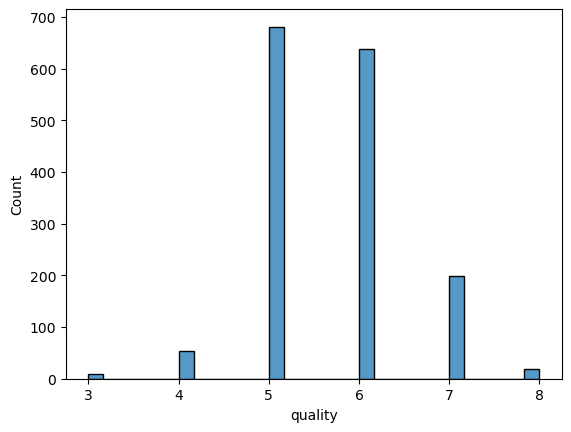

In [4]:
# Cek variabel kualitas wine

sns.histplot(df.quality)

In [5]:
# Wine bagus, sesuai deskripsi datasetnya, nilai kualitas di atas 6.5
wine_bagus = df[df.quality >= 6.5]

# Total wine bagus
wine_bagus.quality.value_counts().sum()

217

In [6]:
# Kebalikan dari wine bagus, wine jelek sesuai deskripsi datasetnya, nilai kualitas di bawah 6.5
wine_jelek = df[df.quality <= 6.5]
# Total wine jelek
wine_jelek.quality.value_counts().sum()

1382

In [7]:
# Membuat kolom baru menyederhanakan kualitas wine sesuai deskripsi, jika nilai kualitas di atas 6.5 artinya bagus atau bernilai 1

df['wine_bagus'] = df['quality'].apply(lambda x : 1 if x >= 6.5 else 0)
df.drop('quality', axis = 1, inplace = True)
df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,wine_bagus
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


wine_bagus
0    1382
1     217
Name: count, dtype: int64

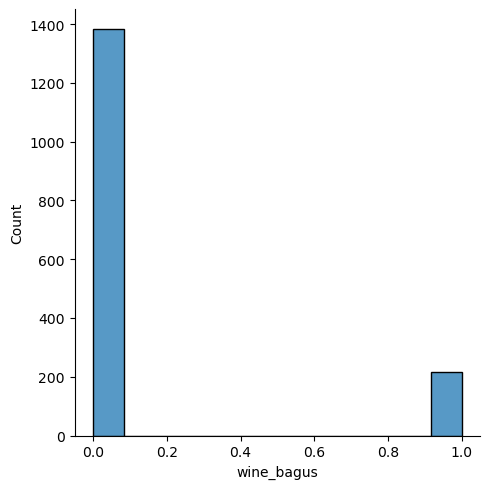

In [8]:
# Mencocokkan kembali jumlah wine bagus dan tidak bagus (217 dan 1382)
sns.displot(x = 'wine_bagus', data = df)

df.wine_bagus.value_counts()

<Axes: >

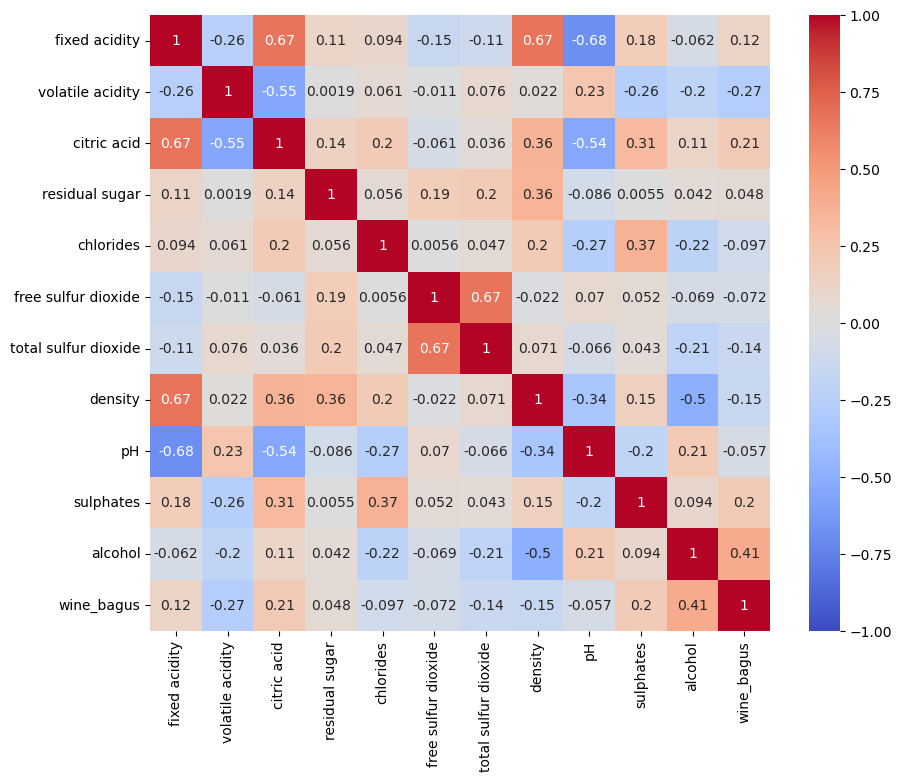

In [9]:
# Melihat korelasi antar variabel

plt.figure(figsize = (10, 8))
sns.heatmap(df.corr(), vmin = -1, vmax = 1, annot = True, cmap = 'coolwarm')

Sebenarnya aku ingin drop korelasi yang mendekati angka 0, namun karena keterbatasan pengetahuan mengenai komposisi _wine_, maka aku tidak akan drop dan tetap menggunakan variabel tersebut

In [10]:
# Membuat variabel x & y

x = df.drop('wine_bagus', axis = 1)
y = df['wine_bagus']

In [11]:
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [12]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: wine_bagus, Length: 1599, dtype: int64

## **MODELLING**

### Dikarenakan data imbalance, jadi aku akan melakukan undersampling atau upsampling terlebih dahulu sebelum memasuki proses model

In [13]:
# Melakukan test train split data terlebih dahulu

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 7)

In [14]:
# Cek variable train

x_train.shape, y_train.shape

((1279, 11), (1279,))

In [15]:
# Cek value y_train

y_train.value_counts()

wine_bagus
0    1103
1     176
Name: count, dtype: int64

In [16]:
# Cek variable test

x_test.shape, y_test.shape

((320, 11), (320,))

#### Near-Miss Undersampling

In [17]:
from imblearn.under_sampling import NearMiss

metode_nm = NearMiss(version = 3, sampling_strategy = 'majority')
x_nm, y_nm = metode_nm.fit_resample(x_train, y_train)
print(f'Jumlah value original x train {y_train.value_counts()}\n\nJumlah value x train NearMiss {y_nm.value_counts()}')

Jumlah value original x train wine_bagus
0    1103
1     176
Name: count, dtype: int64

Jumlah value x train NearMiss wine_bagus
0    176
1    176
Name: count, dtype: int64


In [18]:
# Membuat fungsi untuk running beberapa model
from sklearn.model_selection import cross_val_score

def crossValModel(nama_model, x, y):
    nama_model = nama_model
    nama_model.fit(x, y)
    print(f'Cross validation skor: {cross_val_score(nama_model, x, y)}')

In [19]:
# Import model klasifikasi yang akan dipakai

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model._stochastic_gradient import SGDClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [20]:
# Melihat cross-val-score dari beberapa model

print('Random Forest Classifier')
crossValModel(RandomForestClassifier(), x_nm, y_nm)
print('\nSVM')
crossValModel(SVC(), x_nm, y_nm)
print('\nDecision Tree Classifier')
crossValModel(DecisionTreeClassifier(), x_nm, y_nm)
print('\nSGDC Classifier')
crossValModel(SGDClassifier(), x_nm, y_nm)
print('\nMLP Classifier')
crossValModel(MLPClassifier(max_iter = 3000), x_nm, y_nm)
print('\nGaussian Naive Beyes')
crossValModel(GaussianNB(), x_nm, y_nm)

Random Forest Classifier
Cross validation skor: [0.76056338 0.74647887 0.78571429 0.72857143 0.67142857]

SVM
Cross validation skor: [0.30985915 0.71830986 0.67142857 0.48571429 0.48571429]

Decision Tree Classifier
Cross validation skor: [0.6056338  0.66197183 0.77142857 0.61428571 0.61428571]

SGDC Classifier
Cross validation skor: [0.49295775 0.6056338  0.71428571 0.64285714 0.47142857]

MLP Classifier
Cross validation skor: [0.47887324 0.70422535 0.71428571 0.62857143 0.55714286]

Gaussian Naive Beyes
Cross validation skor: [0.47887324 0.66197183 0.64285714 0.62857143 0.67142857]


Dengan melihat cross-val-score, model Random Forest Classifier mempunyai performa yang cukup bagus dibanding yang lainnya, oleh karena itu aku akan memilih model tersebut dalam Near-Miss Undersampling

In [21]:
model_nm = RandomForestClassifier()
model_nm.fit(x_nm, y_nm)

y_pred_nm = model_nm.predict(x_test)

In [22]:
# Membuat feature dari nama kolom, yang nantinya akan digunakan dalam visualisasi importance feature

feature = x_nm.columns.values.tolist()

<BarContainer object of 11 artists>

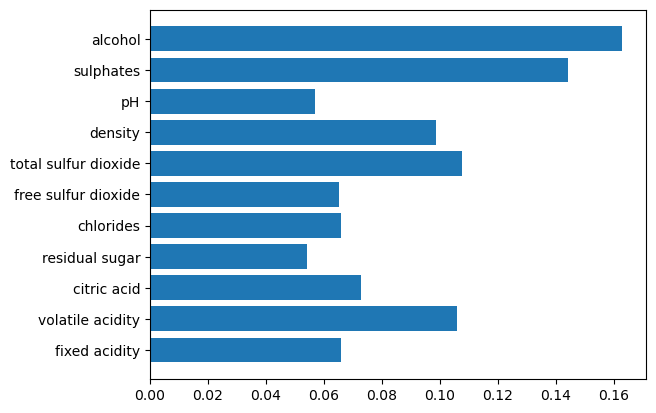

In [23]:
# Melihat importance feature 

plt.barh(feature, model_nm.feature_importances_)

Evaluasi model Random Forest Classifier

In [24]:
from sklearn.metrics import classification_report

print(f'Laporan Klasifikasi Model\n{classification_report(y_true = y_test, y_pred = y_pred_nm)}')

Laporan Klasifikasi Model
              precision    recall  f1-score   support

           0       0.98      0.78      0.87       279
           1       0.37      0.90      0.53        41

    accuracy                           0.79       320
   macro avg       0.68      0.84      0.70       320
weighted avg       0.90      0.79      0.82       320



Text(70.72222222222221, 0.5, 'Kenyataannya')

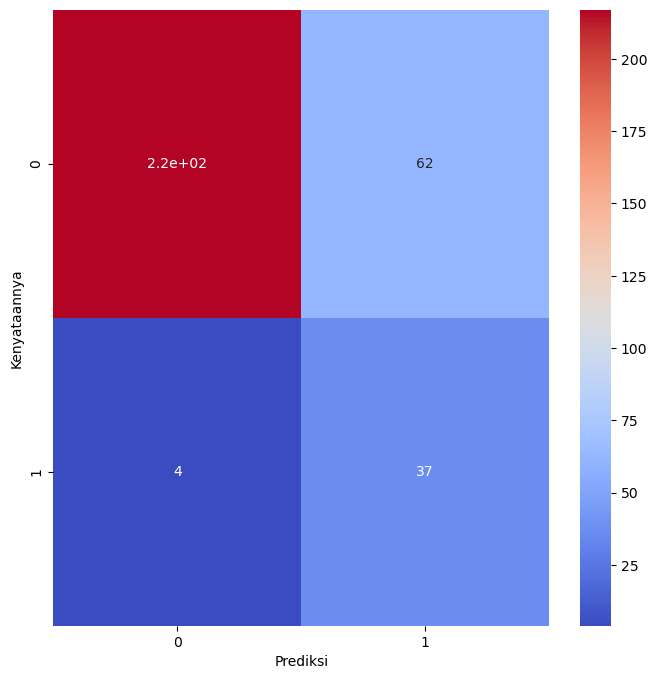

In [25]:
# Menggunakan confusion matrix untuk visualisasi prediksi

import seaborn as sn
from sklearn.metrics import confusion_matrix

cm_nm = confusion_matrix(y_test, y_pred_nm)


plt.figure(figsize = (8, 8))
sn.heatmap(cm_nm, annot = True, cmap = 'coolwarm')
plt.xlabel('Prediksi')
plt.ylabel('Kenyataannya')

Dari hasil visualisasi di atas, performa model sangat kurang bagus, karena jika dilihat perbandingan prediksi benar : kenyataan salah, terlalu banyak daripada prediksi benar : kenyataan benar

#### Random Under Sampling Imbalearn

In [26]:
# Modul random under sampling

from imblearn.under_sampling import RandomUnderSampler

In [27]:
# Membuat variabel random under sampling

metode_rus = RandomUnderSampler(random_state = 7)
x_rus, y_rus = metode_rus.fit_resample(x_train, y_train)

In [28]:
print(f'Jumlah value original x train {y_train.value_counts()}\n\nJumlah value x train Random Under Sampling {y_rus.value_counts()}')

Jumlah value original x train wine_bagus
0    1103
1     176
Name: count, dtype: int64

Jumlah value x train Random Under Sampling wine_bagus
0    176
1    176
Name: count, dtype: int64


In [29]:
# Melihat cross-val-score dari beberapa model

print('Random Forest Classifier')
crossValModel(RandomForestClassifier(), x_rus, y_rus)
print('\nSVM')
crossValModel(SVC(), x_rus, y_rus)
print('\nDecision Tree Classifier')
crossValModel(DecisionTreeClassifier(), x_rus, y_rus)
print('\nSGDC Classifier')
crossValModel(SGDClassifier(), x_rus, y_rus)
print('\nMLP Classifier')
crossValModel(MLPClassifier(max_iter = 3000), x_rus, y_rus)
print('\nGaussian Naive Beyes')
crossValModel(GaussianNB(), x_rus, y_rus)

Random Forest Classifier
Cross validation skor: [0.8028169  0.77464789 0.78571429 0.9        0.85714286]

SVM
Cross validation skor: [0.56338028 0.64788732 0.54285714 0.61428571 0.64285714]

Decision Tree Classifier
Cross validation skor: [0.67605634 0.66197183 0.74285714 0.81428571 0.8       ]

SGDC Classifier
Cross validation skor: [0.49295775 0.52112676 0.51428571 0.57142857 0.67142857]

MLP Classifier
Cross validation skor: [0.67605634 0.77464789 0.78571429 0.72857143 0.78571429]

Gaussian Naive Beyes
Cross validation skor: [0.74647887 0.73239437 0.72857143 0.7        0.77142857]


Random Forest Classifier masih terlihat cukup bagus performanya dalam random under sampler, jadi di sini saya akan menggunakan classifier tersebut

In [30]:
# Membuat model

model_rus = RandomForestClassifier()
model_rus.fit(x_rus, y_rus)

y_pred_rus = model_rus.predict(x_test)

<BarContainer object of 11 artists>

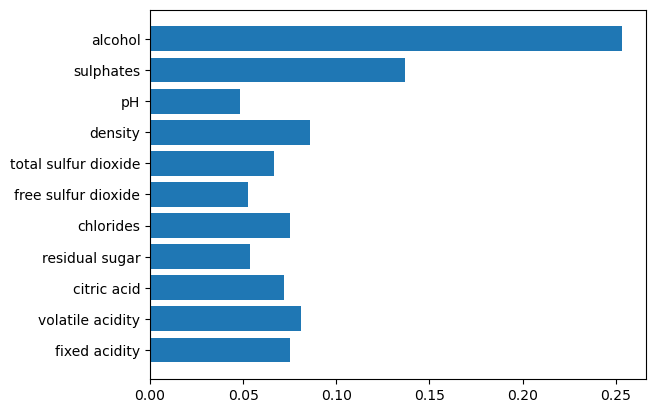

In [31]:
# Melihat importance feature

plt.barh(feature, model_rus.feature_importances_)

Evaluasi Random Forest Classifier

In [32]:
print(f'Laporan Klasifikasi Model\n{classification_report(y_true = y_test, y_pred = y_pred_rus)}')

Laporan Klasifikasi Model
              precision    recall  f1-score   support

           0       0.98      0.73      0.84       279
           1       0.33      0.90      0.49        41

    accuracy                           0.76       320
   macro avg       0.66      0.82      0.66       320
weighted avg       0.90      0.76      0.79       320



Text(70.72222222222221, 0.5, 'Kenyataannya')

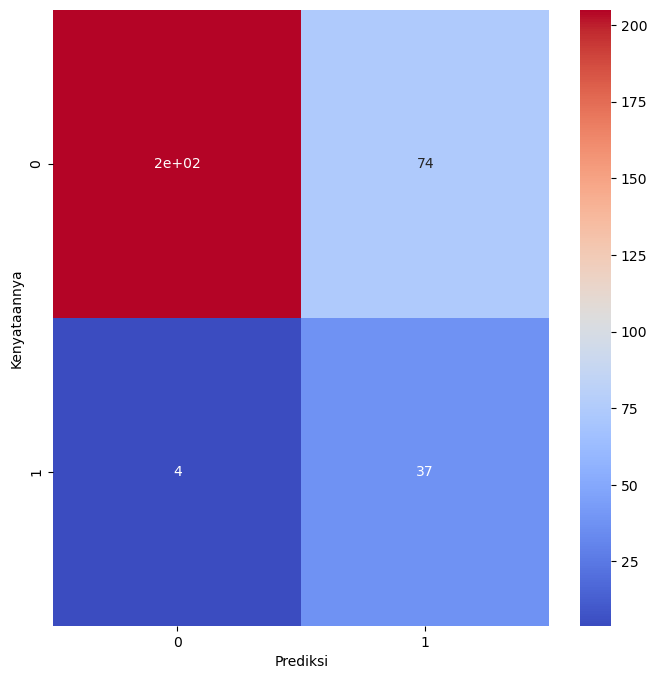

In [33]:
# Menggunakan confusion matrix untuk visualisasi prediksi
cm_rus = confusion_matrix(y_test, y_pred_rus)


plt.figure(figsize = (8, 8))
sn.heatmap(cm_rus, annot = True, cmap = 'coolwarm')
plt.xlabel('Prediksi')
plt.ylabel('Kenyataannya')

Dengan random undersampling masih terlihat kurang bagus performa dari model Random Forest Classifier

#### SMOTE Upsampling

In [34]:
# Modul SMOTE

from imblearn.over_sampling import SMOTE

In [35]:
# Membuat variabel SMOTE

metode_SMOTE = SMOTE(random_state = 7, sampling_strategy = 'minority')
x_SMOTE, y_SMOTE = metode_SMOTE.fit_resample(x_train, y_train)

In [36]:
# Cek value

print(f'Jumlah value original x train {y_train.value_counts()}\n\nJumlah value x train Random Under Sampling {y_SMOTE.value_counts()}')

Jumlah value original x train wine_bagus
0    1103
1     176
Name: count, dtype: int64

Jumlah value x train Random Under Sampling wine_bagus
0    1103
1    1103
Name: count, dtype: int64


In [37]:
# Melihat cross-val-score dari beberapa model

print('Random Forest Classifier')
crossValModel(RandomForestClassifier(), x_SMOTE, y_SMOTE)
print('\nSVM')
crossValModel(SVC(), x_SMOTE, y_SMOTE)
print('\nDecision Tree Classifier')
crossValModel(DecisionTreeClassifier(), x_SMOTE, y_SMOTE)
print('\nSGDC Classifier')
crossValModel(SGDClassifier(), x_SMOTE, y_SMOTE)
print('\nMLP Classifier')
crossValModel(MLPClassifier(max_iter = 3000), x_SMOTE, y_SMOTE)
print('\nGaussian Naive Beyes')
crossValModel(GaussianNB(), x_SMOTE, y_SMOTE)

Random Forest Classifier
Cross validation skor: [0.91402715 0.93650794 0.92290249 0.9478458  0.95464853]

SVM
Cross validation skor: [0.70588235 0.75510204 0.71201814 0.69387755 0.70068027]

Decision Tree Classifier
Cross validation skor: [0.86425339 0.90249433 0.87301587 0.91609977 0.88435374]

SGDC Classifier
Cross validation skor: [0.68325792 0.7414966  0.82993197 0.79365079 0.79818594]

MLP Classifier
Cross validation skor: [0.79638009 0.85260771 0.83673469 0.86394558 0.85714286]

Gaussian Naive Beyes
Cross validation skor: [0.760181   0.82086168 0.80045351 0.85487528 0.80952381]


Random Forest Classifier terlihat bagus dibanding yang lainnya, jadi saya akan menggunakan Random Forest Classifier untuk metode SMOTE

In [38]:
# Membuat model untuk SMOTE

model_SMOTE = RandomForestClassifier()
model_SMOTE.fit(x_SMOTE, y_SMOTE)

y_pred_SMOTE = model_SMOTE.predict(x_test)

<BarContainer object of 11 artists>

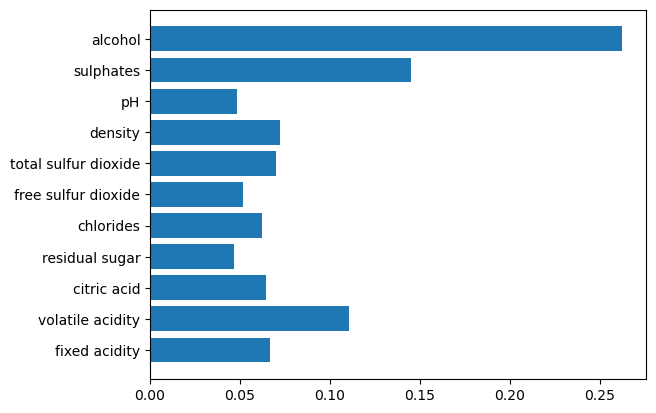

In [39]:
# Melihat importance feature

plt.barh(feature, model_SMOTE.feature_importances_)

Evaluasi model metode SMOTE

In [40]:
print(f'Laporan Klasifikasi Model\n{classification_report(y_true = y_test, y_pred = y_pred_SMOTE)}')

Laporan Klasifikasi Model
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       279
           1       0.52      0.78      0.63        41

    accuracy                           0.88       320
   macro avg       0.74      0.84      0.78       320
weighted avg       0.91      0.88      0.89       320



Text(70.72222222222221, 0.5, 'Kenyataannya')

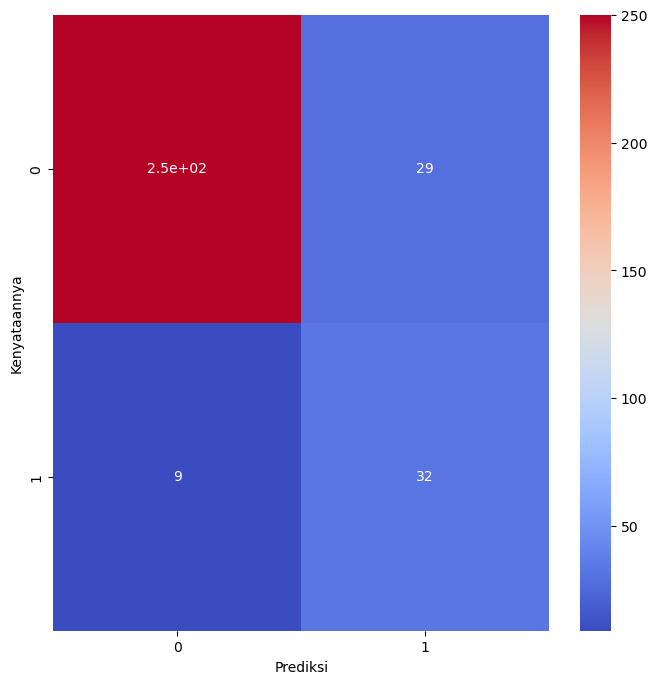

In [41]:
# Menggunakan confusion matrix untuk visualisasi prediksi
cm_rus = confusion_matrix(y_test, y_pred_SMOTE)


plt.figure(figsize = (8, 8))
sn.heatmap(cm_rus, annot = True, cmap = 'coolwarm')
plt.xlabel('Prediksi')
plt.ylabel('Kenyataannya')

Model lumayan membaik namun masih kurang bagus, karena persentase benar dan salah dalam memprediksi nilai 1 kurang lebih 50:50

#### Metode upsampling ADASYN

In [42]:
# Import modul

from imblearn.over_sampling import ADASYN

In [43]:
# Membuat variabel ADASYN

metode_ADASYN = ADASYN(random_state = 7)
x_ADASYN, y_ADASYN = metode_ADASYN.fit_resample(x_train, y_train)

In [44]:
# Cek value

print(f'Jumlah value original x train {y_train.value_counts()}\n\nJumlah value x train Random Under Sampling {y_SMOTE.value_counts()}')

Jumlah value original x train wine_bagus
0    1103
1     176
Name: count, dtype: int64

Jumlah value x train Random Under Sampling wine_bagus
0    1103
1    1103
Name: count, dtype: int64


In [45]:
# Melihat cross-val-score dari beberapa model

print('Random Forest Classifier')
crossValModel(RandomForestClassifier(), x_ADASYN, y_ADASYN)
print('\nSVM')
crossValModel(SVC(), x_ADASYN, y_ADASYN)
print('\nDecision Tree Classifier')
crossValModel(DecisionTreeClassifier(), x_ADASYN, y_ADASYN)
print('\nSGDC Classifier')
crossValModel(SGDClassifier(), x_ADASYN, y_ADASYN)
print('\nMLP Classifier')
crossValModel(MLPClassifier(max_iter = 3000), x_ADASYN, y_ADASYN)
print('\nGaussian Naive Beyes')
crossValModel(GaussianNB(), x_ADASYN, y_ADASYN)

Random Forest Classifier
Cross validation skor: [0.91343964 0.91799544 0.8929385  0.94520548 0.95205479]

SVM
Cross validation skor: [0.69248292 0.69020501 0.72665148 0.67808219 0.72146119]

Decision Tree Classifier
Cross validation skor: [0.84510251 0.90660592 0.87243736 0.89269406 0.87671233]

SGDC Classifier
Cross validation skor: [0.71070615 0.76309795 0.74715262 0.82648402 0.67579909]

MLP Classifier
Cross validation skor: [0.82460137 0.7904328  0.82004556 0.84931507 0.80593607]

Gaussian Naive Beyes
Cross validation skor: [0.75398633 0.81548975 0.78132118 0.80365297 0.76940639]


Random Forest Classifier masih mengungguli yang lainnya dalam metode ADASYN

In [46]:
# Membuat model untuk ADASYN

model_ADASYN = RandomForestClassifier()
model_ADASYN.fit(x_ADASYN, y_ADASYN)

y_pred_ADASYN = model_ADASYN.predict(x_test)

<BarContainer object of 11 artists>

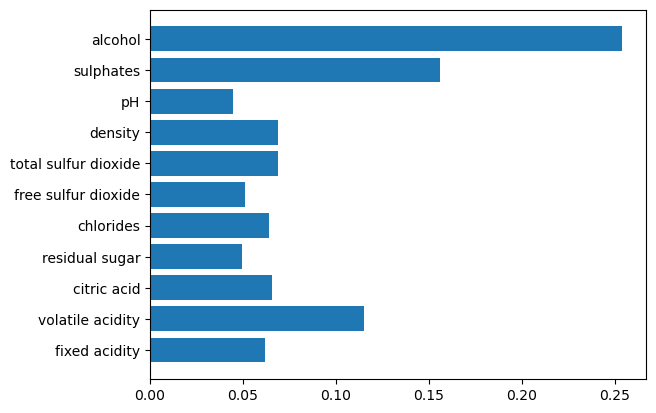

In [47]:
# Melihat importance feature

plt.barh(feature, model_ADASYN.feature_importances_)

Evaluasi model Random Forest Classifier metode ADASYN

In [48]:
# Melihat laporan klasifikasi Random Forest Classifier metode ADASYN

print(f'Laporan Klasifikasi Model\n{classification_report(y_true = y_test, y_pred = y_pred_ADASYN)}')

Laporan Klasifikasi Model
              precision    recall  f1-score   support

           0       0.97      0.87      0.92       279
           1       0.49      0.83      0.62        41

    accuracy                           0.87       320
   macro avg       0.73      0.85      0.77       320
weighted avg       0.91      0.87      0.88       320



Text(70.72222222222221, 0.5, 'Kenyataannya')

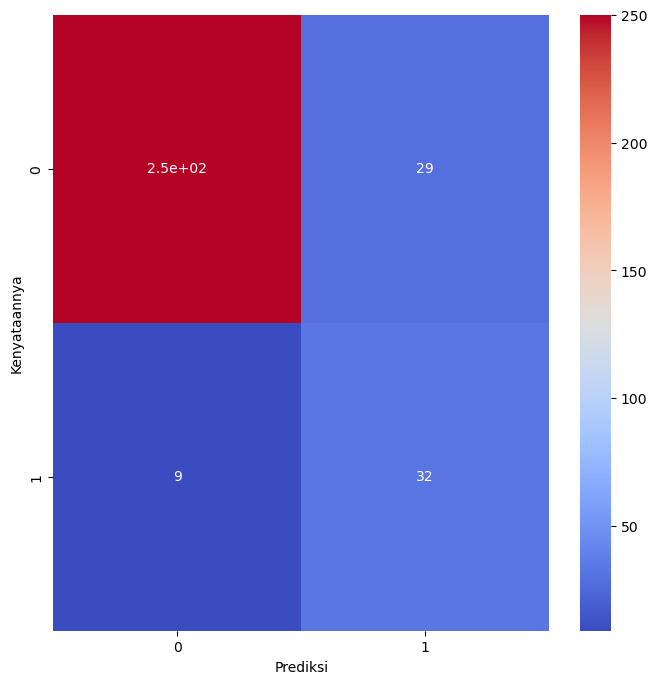

In [49]:
# Menggunakan confusion matrix untuk visualisasi prediksi
cm_rus = confusion_matrix(y_test, y_pred_SMOTE)


plt.figure(figsize = (8, 8))
sn.heatmap(cm_rus, annot = True, cmap = 'coolwarm')
plt.xlabel('Prediksi')
plt.ylabel('Kenyataannya')

Performa sama seperti metode SMOTE

Hyperparameter model ADASYN

In [77]:
# Membuat model RFC ADASYN dengan parameter

model_ADASYN = RandomForestClassifier(
    n_estimators = 50,
    criterion = 'log_loss',
    min_weight_fraction_leaf = 0.5,
    max_features = 'sqrt',
    bootstrap = True,
    oob_score = True,
    random_state = 7,
    warm_start = True,
)

In [78]:
# Test model

model_ADASYN.fit(x_ADASYN, y_ADASYN)
print('Random Forest Classifier')
crossValModel(RandomForestClassifier(), x_ADASYN, y_ADASYN)

Random Forest Classifier
Cross validation skor: [0.91571754 0.91571754 0.89749431 0.94977169 0.93378995]


In [83]:
# Membuat GridSearchCV

from sklearn.model_selection import GridSearchCV

hyperparameter = GridSearchCV(RandomForestClassifier(),
    {'criterion' : ['gini', 'entropy', 'log_loss'],
     'min_weight_fraction_leaf' : [0.0, 0.5],
     'max_features' : ['sqrt', 'log2', None],
     'bootstrap' : [True, False],
     'oob_score' : [True, False],
     'random_state' : [7],
     'warm_start' : [True, False],
    }
)

hyperparameter.fit(x_ADASYN, y_ADASYN)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_features': ['sqrt', 'log2', None],
                         'min_weight_fraction_leaf': [0.0, 0.5],
                         'oob_score': [True, False], 'random_state': [7],
                         'warm_start': [True, False]})

In [90]:
parameter_GSCV = pd.DataFrame(hyperparameter.cv_results_)
parameter_GSCV

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_bootstrap,param_criterion,param_max_features,param_min_weight_fraction_leaf,param_oob_score,param_random_state,param_warm_start,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.408277,0.009218,0.008642,0.000576,True,gini,sqrt,0.0,True,7,True,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.911162,0.911162,0.888383,0.956621,0.949772,0.923420,0.025787,13
1,0.404329,0.007555,0.008811,0.000326,True,gini,sqrt,0.0,True,7,False,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.911162,0.911162,0.888383,0.956621,0.949772,0.923420,0.025787,13
2,0.372647,0.011724,0.009210,0.000652,True,gini,sqrt,0.0,False,7,True,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.911162,0.911162,0.888383,0.956621,0.949772,0.923420,0.025787,13
3,0.370394,0.012432,0.008720,0.000157,True,gini,sqrt,0.0,False,7,False,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.911162,0.911162,0.888383,0.956621,0.949772,0.923420,0.025787,13
4,0.184298,0.001763,0.006546,0.000197,True,gini,sqrt,0.5,True,7,True,"{'bootstrap': True, 'criterion': 'gini', 'max_...",0.763098,0.769932,0.792711,0.502283,0.502283,0.666061,0.134083,55
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,1.607028,0.149155,0.007376,0.000616,False,log_loss,None,0.0,False,7,False,"{'bootstrap': False, 'criterion': 'log_loss', ...",0.854214,0.883827,0.854214,0.915525,0.867580,0.875072,0.022975,51
140,0.002827,0.000423,0.000000,0.000000,False,log_loss,None,0.5,True,7,True,"{'bootstrap': False, 'criterion': 'log_loss', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
141,0.002492,0.000518,0.000000,0.000000,False,log_loss,None,0.5,True,7,False,"{'bootstrap': False, 'criterion': 'log_loss', ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,109
142,0.221034,0.008358,0.006169,0.001161,False,log_loss,None,0.5,False,7,True,"{'bootstrap': False, 'criterion': 'log_loss', ...",0.756264,0.699317,0.699317,0.502283,0.502283,0.631893,0.107849,103


In [94]:
hyperparameter.best_score_

0.9316233448788758

In [95]:
hyperparameter.best_params_

{'bootstrap': False,
 'criterion': 'entropy',
 'max_features': 'sqrt',
 'min_weight_fraction_leaf': 0.0,
 'oob_score': False,
 'random_state': 7,
 'warm_start': True}

In [109]:
# Membuat model RFC ADASYN dengan parameter

model_ADASYN = RandomForestClassifier(
    bootstrap = False,
    criterion = 'entropy',
    max_features = 'sqrt',
    min_weight_fraction_leaf = 0.0,
    oob_score = False,
    random_state = 7,
    warm_start = True,
)

In [110]:
# Test model

model_ADASYN.fit(x_ADASYN, y_ADASYN)
y_pred_ADASYN = model_ADASYN.predict(x_test)

<BarContainer object of 11 artists>

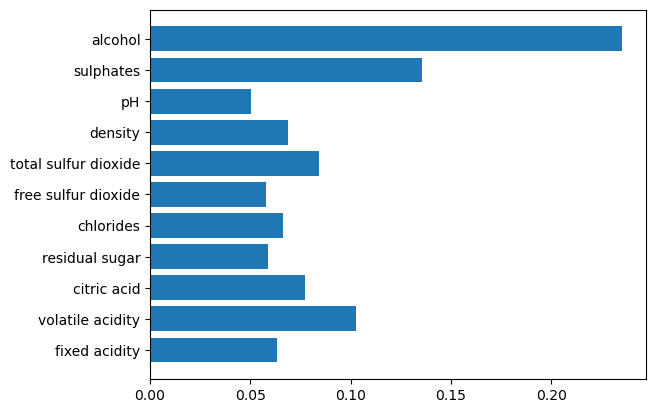

In [111]:
# Melihat importance feature

plt.barh(feature, model_ADASYN.feature_importances_)

In [112]:
# Melihat laporan klasifikasi Random Forest Classifier metode ADASYN

print(f'Laporan Klasifikasi Model\n{classification_report(y_true = y_test, y_pred = y_pred_ADASYN)}')

Laporan Klasifikasi Model
              precision    recall  f1-score   support

           0       0.97      0.90      0.93       279
           1       0.52      0.78      0.63        41

    accuracy                           0.88       320
   macro avg       0.74      0.84      0.78       320
weighted avg       0.91      0.88      0.89       320



Text(70.72222222222221, 0.5, 'Kenyataannya')

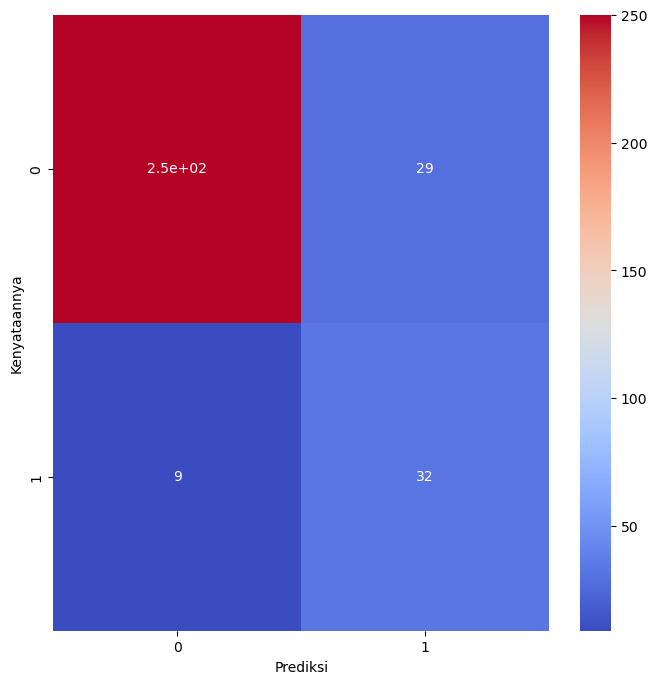

In [113]:
# Menggunakan confusion matrix untuk visualisasi prediksi
cm_rus = confusion_matrix(y_test, y_pred_SMOTE)


plt.figure(figsize = (8, 8))
sn.heatmap(cm_rus, annot = True, cmap = 'coolwarm')
plt.xlabel('Prediksi')
plt.ylabel('Kenyataannya')

Setelah mencari hyperparameter dari random forest classifier hasilnya sama saja, yasudahlah, that's all i can do T.T